In [1]:
from helper import *
import numpy as np

In [45]:
def mean_squared_error_gd(y, tx, initial_w, max_iters, gamma):
    """Calculates the gradient of the unregularized loss and uses it in gradient descent to approximate optimal weights
    y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Args:
        y (np.ndarray): shape = (N,) contains the data we want to predict
        tx (np.ndarray): shape = (N,2) contains the features used to predict
        initial_w (np.ndarray): shape = (2,) the initial weight pair that will get updated with gradient
        max_iters (int): maximum number of steps
        gamma (float): learning rate

    Returns:
        np.ndarray : shape = (2,) optimal weights
        float : mean squared erros
    """
    w = initial_w # initiate w_{t}
    for n_iter in range(max_iters):
        e = y - np.dot(tx,w)
        gradient = -tx.T.dot(e) / len(e)
        new_w = w - gamma * gradient # w_{t+1} = w_{t} - gamma * \/L(w_{t})
        w = new_w # update w_{t} with the value of w_{t+1} for the next iteration
    e = y - np.dot(tx,w)
    return w, compute_mse(e)

def mean_squared_error_sgd(y, tx, initial_w, max_iters, gamma):  
    """Calculates the gradient of the unregularized loss and uses it in stochastic gradient descent to approximate optimal weights

    Args:
        y (np.ndarray): shape = (N,) contains the data we want to predict
        tx (np.ndarray): shape = (N,2) contains the features used to predict
        initial_w (np.ndarray): shape = (2,) the initial weight pair that will get updated with gradient
        max_iters (int): maximum number of steps
        gamma (float): learning rate

    Returns:
        np.ndarray : shape = (2,) optimal weights
        float : mean squared erros
    """
    w = initial_w # initiate w_{t}
    for n_iter in range(max_iters):
        new_w = w - gamma * compute_stoch_gradient(y, tx, w) # w_{t+1} = w_{t} - gamma * \/L_n(w_{t})
        w = new_w # update w_{t} with the value of w_{t+1} for the next iteration
    e = y - tx.dot(w)
    return w, compute_mse(e)
    

    
def least_squares(y, tx):
    """Computes optimal weights by solving the normal equation

    Args:
        y (np.ndarray): shape = (N,) contains the data we want to predict
        tx (np.ndarray): shape = (N,2) contains the features used to predict

    Returns:
        np.ndarray : shape = (2,) optimal weights
        float : mean squared error
    """
    txT = tx.T #transpose calculation to avoid computing it twice in the arguments of np.linalg.solve
    w = np.linalg.solve(txT.dot(tx),txT.dot(y))
    #return w, compute_mse(y, tx, w)
    e = y - tx.dot(w)
    return w, compute_mse(e)


def ridge_regression(y, tx, lambda_, cost = 'mse'):
    """Implements ridge regression with L2 regularisation to optimize weights by solving normal equation. 

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        lambda_: penalization coefficient.
        cost: str {'mse', 'mae'}, default = 'mse', can also be 'mae

    Returns:
        np.ndarray : shape = (D, ) optimal weights, D is the number of features.
        float: mse or mae loss

    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 0)
    array([ 0.21212121, -0.12121212])
    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 1)
    array([0.03947092, 0.00319628])
    """
    N = y.size
    D = tx.shape[1]
    txT = tx.T
    w = np.linalg.solve(np.dot(txT, tx) + 2*N*lambda_ * np.identity(D) , np.dot(txT, y))
    e = y - tx.dot(w)
    if cost == 'mse':
        loss = compute_mse(e)
    else:
        loss = compute_mae(e)
    return w, loss
    

def logistic_regression(y, tx, initial_w, max_iters, gamma, labels=True):
    """Will perform logistic regression on tx and y, bu computing gradient and updating w max_iter times.

    Args:
        y (np.ndarray): shape = (N,) contains the data we want to predict
        tx (np.ndarray): shape = (N,2) contains the features used to predict
        initial_w (np.ndarray): shape = (2,) the initial weight pair that will get updated with gradient
        max_iters (int): maximum number of steps
        gamma (float): learning rate
        labels: True (default) if we use {0,1} labels, False if we use {-1,1} labels

     Returns:
        np.ndarray : shape = (2,) optimal weights
        float : mean squared error
    """
    w = initial_w

    if(labels == True):

        for n_iter in range(max_iters):
            s = sigmoid(tx.dot(w))
            gradient = - (tx.T).dot(y - s) / len(y)
            new_w = w - gamma * gradient # w_{t+1} = w_{t} - gamma * \/L_n(w_{t})
            w = new_w # update w_{t} with the value of w_{t+1} for the next iteration

        s = sigmoid(tx.dot(w))
        loss = - np.mean(y * np.log(s) + (1 - y) * np.log(1 - s))

    if(labels == False):
        # we use the Hinge loss for labels {-1, 1}
        # H is the hinge loss vector

        for n_iter in range(max_iters):
            H = np.max(0, 1 - y * np.dot(tx, w))
            gradient = -np.dot(tx.T, y * (H > 0))
            new_w = w - gamma * gradient # w_{t+1} = w_{t} - gamma * \/L_n(w_{t})
            w = new_w # update w_{t} with the value of w_{t+1} for the next iteration
        
        loss = np.mean(np.max(0, 1 - y * tx.dot(w)))

    return w, loss

    
def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma, labels =True):
    """_summary_

    Args:
        y (np.ndarray): shape = (N,) contains the data we want to predict
        tx (np.ndarray): shape = (N,2) contains the features used to predict
        lambda_ (float): penalization coefficient
        initial_w (np.ndarray): shape = (2,) the initial weight pair that will get updated with gradient
        max_iters (int): maximum number of steps
        gamma (float): learning rate
        labels: True (default) if we use {0,1} labels, False if we use {-1,1} labels

    Returns:
        np.ndarray : shape = (2,) optimal weights
        float : mean squared error
    """

    w = initial_w

    if(labels == True):

        for n_iter in range(max_iters):
            s = sigmoid(tx.dot(w))
            gradient = - (tx.T).dot(y - s) / len(y) +  2 * lambda_ * np.abs(w)
            new_w = w - gamma * gradient # w_{t+1} = w_{t} - gamma * \/L_n(w_{t})
            w = new_w # update w_{t} with the value of w_{t+1} for the next iteration

        s = sigmoid(tx.dot(w))
        loss = - np.mean(y * np.log(s) + (1 - y) * np.log(1 - s))

    if(labels == False):
        # we use the Hinge loss for labels {-1, 1}
        # H is the hinge loss vector

        for n_iter in range(max_iters):
            H = np.max(0, 1 - y * np.dot(tx, w))
            gradient = -np.dot(tx.T, y * (H > 0)) +  2 * lambda_ * np.abs(w)
            new_w = w - gamma * gradient # w_{t+1} = w_{t} - gamma * \/L_n(w_{t})
            w = new_w # update w_{t} with the value of w_{t+1} for the next iteration
        
        loss = np.mean(np.max(0, 1 - y * tx.dot(w)))

    return w, loss



def train(model, y, x, initial_w = 0, max_iters = 0, gamma = 0, lambda_ = 0, cost = 'mse'):
    if model == 'gradient descent':
        w, loss = mean_squared_error_gd(y,x, initial_w, max_iters, gamma)
        
    elif model == 'stochastic gradient descent':
        w, loss = mean_squared_error_sgd(y, x, initial_w, max_iters, gamma)
    elif model == 'least squares':
        w, loss = least_squares(y, x)
        
        
    elif model == 'ridge regression':
        w, loss = ridge_regression(y, x, lambda_, cost)
        
    elif model == 'logistic regression':
        w, loss = logistic_regression(y, x, initial_w, max_iters, gamma)
        
    elif model == 'reg logistic regression':
        w, loss = reg_logistic_regression(y, x, lambda_, initial_w, max_iters, gamma)
        
    else:
        print(f'model name -{model}- is incorrect')
        return 0
    return w, loss

def estimate(predictions, groundtruth):
    #if y is -1 or 1. need to change to 1 and -1 if y is 0,1
    #here assuming negative is -1 and positive 1
    predictions = np.sign(predictions)
    difference = groundtruth - predictions
    accuracy =  np.count_nonzero(difference==0)/len(predictions)
    fp = np.count_nonzero(difference == -2)
    fn = np.count_nonzero(difference == 2)
    pospred = np.where(predictions == 1)
    posgt = np.where(groundtruth == 1)
    tp = len(np.intersect1d(pospred, posgt))
    if (tp + (fp+fn)/2)!= 0:
        f1 = tp / (tp + (fp+fn)/2)
    else:
        f1 = 'mistake'
    #print(difference)
    return f1, accuracy

In [48]:
#generate my fake data
fx = np.random.randn(100000, 4)

fy = np.random.choice([-1,1],size =  100000)


In [52]:
#try running our models
models = ['gradient descent', 'stochastic gradient descent', 'least squares', 'ridge regression', 'logistic regression', 'reg logistic regression']
ws = []
ls = []
for model in models:
    print(f'working on model {model}')
    weights, l = train(model, fy, fx, initial_w = [0,0,0,0], max_iters = 500, gamma = 0.7, lambda_= 0.01)
    ws.append(weights)
    ls.append(l)
    pred = fx.dot(weights)
    f1,acc = estimate(pred, fy)
    print(f'f1: {f1}, accuracy {acc}')
    #if logistic or ridge, need to do cv

working on model gradient descent
f1: 0.5044486115544207, accuracy 0.50318
working on model stochastic gradient descent
f1: 0.49718997004638305, accuracy 0.49809
working on model least squares
f1: 0.5044486115544207, accuracy 0.50318
working on model ridge regression
f1: 0.50445849707754, accuracy 0.50318
working on model logistic regression
f1: 0.5010961290128833, accuracy 0.50161
working on model reg logistic regression
f1: 0.5013960470352764, accuracy 0.50177


In [53]:
ws

[array([ 0.00019598,  0.00378482, -0.00304819,  0.00215502]),
 array([-3.67579100e+41,  1.51694642e+41,  6.21982053e+41, -5.95687249e+41]),
 array([ 0.00019598,  0.00378482, -0.00304819,  0.00215502]),
 array([ 0.00019219,  0.00371026, -0.00298777,  0.00211287]),
 array([ 0.01416086,  0.01449631, -0.00525024,  0.00217249]),
 array([ 0.0131135 ,  0.01341865, -0.00571254,  0.00201041])]

In [54]:
ls

[0.49998593078887027,
 4.4899081075646284e+83,
 0.49998593078887027,
 0.49998593625877724,
 0.6930918921549905,
 0.6930922037740764]

In [68]:

def run_pca(x, n_components, visualisation = False):
    #use standardized data
    cov_mat = np.cov(x , rowvar = False)
    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    
    sorted_eigenvalue = eigen_values[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    eigenvector_subset = sorted_eigenvectors[:,0:n_components]
    x_reduced = np.dot(eigenvector_subset.transpose(),x.transpose()).transpose()
    plot_pca(n_components, sorted_eigenvalue, visualisation)
    
    return x_reduced

def plot_pca(n_components, eigenvalues, visualisation):
    eigenvalues_relative = eigenvalues/np.sum(eigenvalues) * 100
    cum_eigenvalues = np.cumsum(eigenvalues_relative[: n_components])
    plt.plot(range(n_components),cum_eigenvalues , color = 'blue', marker = 'x')
    plt.xlabel("Variance explained (%)")
    plt.ylabel("Principal Component")
    plt.title('Principal Component Analysis')
    plt.grid(True)
    if visualisation == False:
        plt.close()
    plt.savefig('PCA')
    

0


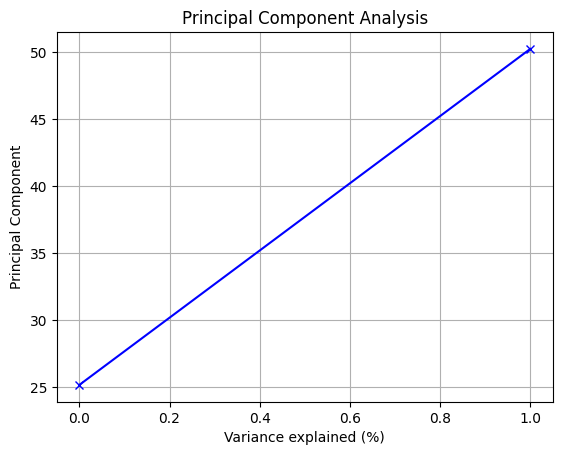

In [74]:
#compare pca mine and that of sklearn
from sklearn.decomposition import PCA

mypca = run_pca(fx, 2, visualisation = True)

otherpca = PCA(n_components = 2)
otherpca.fit(fx)
other_reduced = otherpca.transform(fx)

diff = mypca - other_reduced
print(np.count_nonzero(diff == 0))



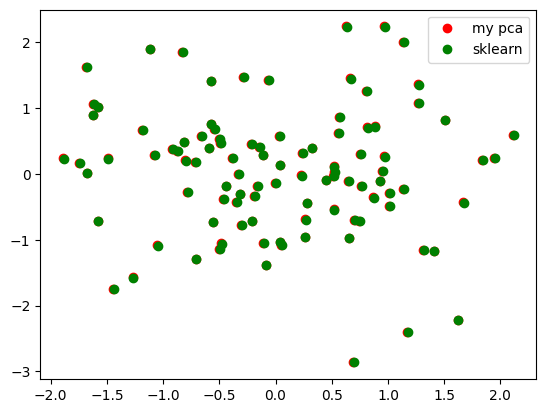

In [82]:
plt.plot(mypca[:100, 0], mypca[:100,1], 
         color = 'red',marker = 'o', linestyle = 'none', label = 'my pca')
plt.plot(other_reduced[:100, 0], other_reduced[:100,1], 
         color = 'green',marker = 'o', linestyle = 'none', label = 'sklearn')
plt.legend()